# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [499]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Read the csv data into a pandas dataframe and display the first 5 samples

In [500]:
Real_estate = pd.read_csv('Real estate.csv')
Real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [501]:
Real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [502]:
Real_estate.shape

(414, 8)

### What are the features available in the dataset?

In [503]:
features_list = Real_estate.columns.tolist()
features_list

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

### Check if any features have missing data

In [504]:
Missing_table = Real_estate.isnull().sum()
Missing_table

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [505]:
X_feature = pd.DataFrame(Real_estate[['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 
                       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']])
X_feature

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [506]:
Y_features = pd.DataFrame(Real_estate[['Y house price of unit area']])
Y_features

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Split the dataset into train and test data

In [507]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_feature, Y_features, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 7)
(83, 7)
(331, 1)
(83, 1)


### Choose the model (Linear Regression)

In [508]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

### Create an Estimator object

In [509]:
X = X_feature.values
X.shape

(414, 7)

### Train the model

In [510]:
model.fit(X, Y_features)

LinearRegression()

### Apply the model

In [511]:
y_fit = model.predict(x_test)
y_fit.ravel()

c:\Users\yatch\poetry-demo\.venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([33.86514036, 47.84253451, 22.33345878, 13.04673621, 43.09465602,
       33.46013903, 30.37617435, 44.4856823 , 37.9292868 , 14.0061475 ,
       11.96157602, 38.31414837, 31.4118217 , 44.95692717, 50.79701913,
       35.53615463, 43.92961419, 45.21256577, 30.24001441, 43.24688438,
       50.65676154, 28.6044496 , 39.28928679, 46.65869239, 46.32719978,
       28.07398386, 31.91889851, 47.58869518, 46.89537276, 14.93513112,
       33.83908337, 33.96764999, 41.76007483, 43.91773036, 48.26523973,
       13.60552276, 40.78760979, 40.72957174, 38.53111622, 13.71666667,
       39.33884835, 24.0437536 , 54.39976105, 36.28806102, 33.9922189 ,
       38.56332214, 30.07693486, 38.70022607, 44.88991696, 32.87535102,
       11.63335437, 44.03927002, 44.1291934 , 13.65744228, 49.82764395,
       41.64365353, 43.34746698, 39.31235465, 37.48024539, 39.84629666,
       23.99893288, 39.85100338, 34.29406952, 12.84370049, 39.58428678,
       44.21212738, 38.52994282, 47.38089493, 15.01052845, 39.25

### Display the coefficients

In [512]:
model.coef_

array([[-3.59350128e-03,  5.07908732e+00, -2.70841959e-01,
        -4.52079011e-03,  1.12927749e+00,  2.24672892e+02,
        -1.44235635e+01]])

### Find how well the trained model did with testing data

In [513]:
from sklearn.metrics import r2_score
print("R2 score:", r2_score(y_test, y_fit))

R2 score: 0.7262081039309468


### Plot House Age Vs Price
#### Hint: Use regplot in sns

c:\Users\yatch\poetry-demo\.venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


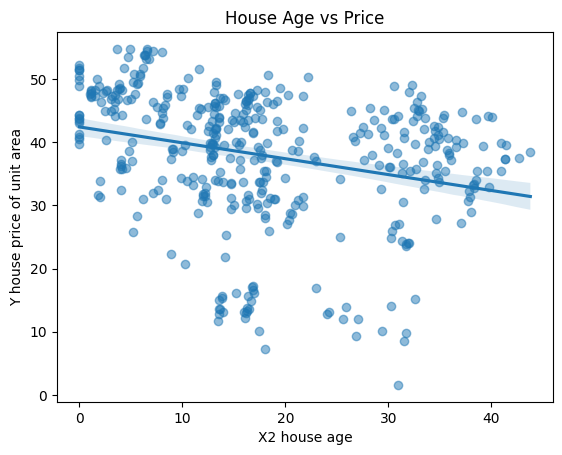

In [514]:
x_data = Real_estate['X2 house age'].values
y_data = model.predict(X_feature)
sns.regplot(x = x_data, y = y_data, scatter_kws={'alpha':0.5})
plt.xlabel('X2 house age')
plt.ylabel('Y house price of unit area')
plt.title('House Age vs Price')
plt.show()

### Plot Distance to MRT station Vs Price

c:\Users\yatch\poetry-demo\.venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


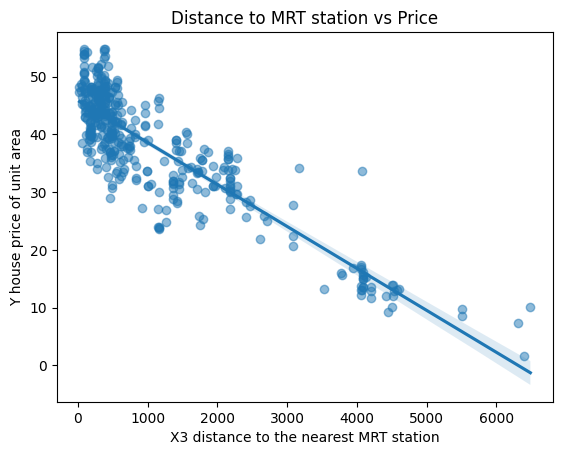

In [515]:
x_data = Real_estate['X3 distance to the nearest MRT station'].values
y_data = model.predict(X_feature)
sns.regplot(x = x_data, y = y_data, scatter_kws={'alpha':0.5})
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.title('Distance to MRT station vs Price')
plt.show()

### Plot Number of Convienience Stores Vs Price

c:\Users\yatch\poetry-demo\.venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


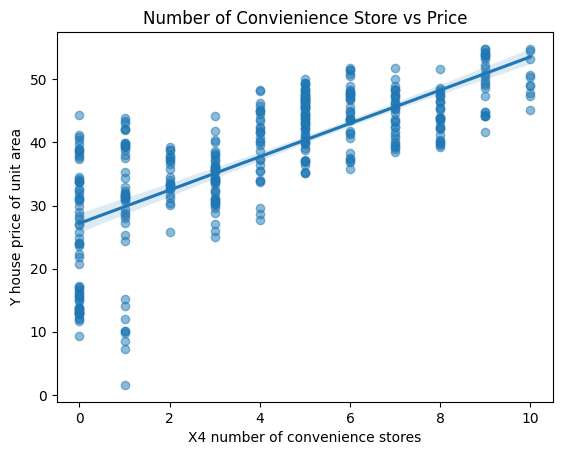

In [516]:
x_data = Real_estate['X4 number of convenience stores'].values
y_data = model.predict(X_feature)
sns.regplot(x = x_data, y = y_data, scatter_kws={'alpha':0.5})
plt.xlabel('X4 number of convenience stores')
plt.ylabel('Y house price of unit area')
plt.title('Number of Convienience Store vs Price')
plt.show()

c:\Users\yatch\poetry-demo\.venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


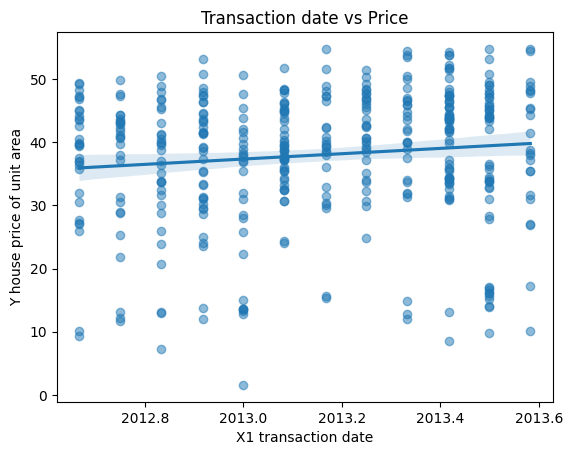

In [517]:
x_data = Real_estate['X1 transaction date'].values
y_data = model.predict(X_feature)
sns.regplot(x = x_data, y = y_data, scatter_kws={'alpha':0.5})
plt.xlabel('X1 transaction date')
plt.ylabel('Y house price of unit area')
plt.title('Transaction date vs Price')
plt.show()

c:\Users\yatch\poetry-demo\.venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


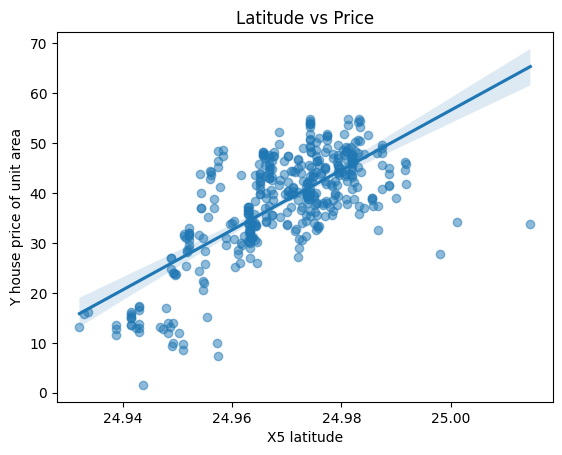

In [518]:
x_data = Real_estate['X5 latitude'].values
y_data = model.predict(X_feature)
sns.regplot(x = x_data, y = y_data, scatter_kws={'alpha':0.5})
plt.xlabel('X5 latitude')
plt.ylabel('Y house price of unit area')
plt.title('Latitude vs Price')
plt.show()

c:\Users\yatch\poetry-demo\.venv\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


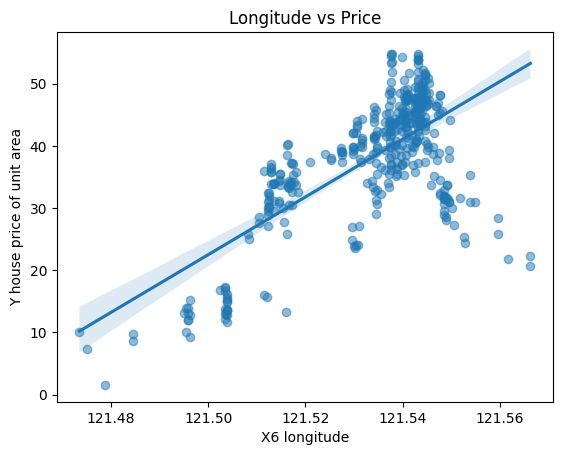

In [519]:
x_data = Real_estate['X6 longitude'].values
y_data = model.predict(X_feature)
sns.regplot(x = x_data, y = y_data, scatter_kws={'alpha':0.5})
plt.xlabel('X6 longitude')
plt.ylabel('Y house price of unit area')
plt.title('Longitude vs Price')
plt.show()